<a href="https://colab.research.google.com/github/Rejuvesh/Zanskar/blob/main/22BDS0267_CYCLE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME:J.REJUVESH**
## **REGNO:22BDS0267**
## **CYCLE SHEET -3**

## Q1. You are mentoring a student team building a basic sentiment analysis model forchatbot responses. Create a synthetic dataset with short text samples labeled aspositive or negative. To keep things simple, they use a SimpleRNN layer in theirKeras model.


In [ ]:
# 1️ Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 2️ Create a small synthetic dataset
texts = [
    "I love this chatbot",
    "This is great",
    "I am very happy",
    "Awesome experience",
    "I hate this chatbot",
    "This is terrible",
    "I am sad",
    "Worst experience ever"
]

# Labels: 1 = positive, 0 = negative
labels = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# 3️ Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# 4️ Pad sequences to ensure equal length
max_len = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

print("Vocabulary:", tokenizer.word_index)
print("Padded Sequences:\n", X)

# 5️ Build the SimpleRNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8, input_length=max_len),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])

# 6️ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7️ Train the model
model.fit(X, labels, epochs=15, verbose=1)

# 8️ Test with new sentences
test_sentences = ["I love it", "This is bad"]
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post')

predictions = model.predict(test_pad)
for i, sentence in enumerate(test_sentences):
    print(f"Sentence: '{sentence}' --> Sentiment: {'Positive 😊' if predictions[i] > 0.5 else 'Negative 😞'}")


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.8.0, so it will not be used.
  warnings.warn(


Vocabulary: {'i': 1, 'this': 2, 'chatbot': 3, 'is': 4, 'am': 5, 'experience': 6, 'love': 7, 'great': 8, 'very': 9, 'happy': 10, 'awesome': 11, 'hate': 12, 'terrible': 13, 'sad': 14, 'worst': 15, 'ever': 16}
Padded Sequences:
 [[ 1  7  2  3]
 [ 2  4  8  0]
 [ 1  5  9 10]
 [11  6  0  0]
 [ 1 12  2  3]
 [ 2  4 13  0]
 [ 1  5 14  0]
 [15  6 16  0]]
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6884
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6250 - loss: 0.6863
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6250 - loss: 0.6842
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6250 - loss: 0.6821
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6250 - loss: 0.6800
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6250 - loss: 0.6779
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6250 - loss: 0.6757
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.6736
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7500 - loss: 0.6715
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.6693
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7500 - loss: 0.6671
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.6649
Epoch 13/15
1/

## Q2.A student team is working with the IMDB movie review dataset to build a sentiment classifier. Use a Bidirectional wrapper around an LSTM layer to capture context from both directions in the review text.


In [ ]:

import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

# 1) Load IMDB dataset (pre-tokenized as integer sequences)
num_words = 10000   # keep top 10k most frequent words
maxlen = 200        # pad / truncate reviews to 200 tokens

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test  = pad_sequences(x_test,  maxlen=maxlen)

# 2) Build a simple Bidirectional LSTM model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 3) Train
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=3,              # keep small for a quick demo
    validation_split=0.2,
    verbose=1
)

# 4) Evaluate on the test set
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")

# 5) Predict on your own text
#    Use the IMDB word_index so we can encode new text similarly to the dataset
word_index = imdb.get_word_index()
index_from = 3  # Keras reserves 0:pad, 1:start, 2:unknown
word_index = {k:(v+index_from) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2

def encode_text(text, word_index, num_words, maxlen):
    # basic cleanup
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s']", " ", text)
    tokens = text.split()

    seq = [1]  # <START>
    for w in tokens:
        idx = word_index.get(w, 2)  # 2 = <UNK>
        # keep only words within the vocabulary size
        if idx < num_words:
            seq.append(idx)
        else:
            seq.append(2)  # <UNK> for out-of-vocab

    return pad_sequences([seq], maxlen=maxlen)

samples = [
    "Absolutely loved this movie, the performances were brilliant!",
    "This was a boring and terrible film. I wouldn't recommend it."
]

preds = model.predict(np.vstack([encode_text(s, word_index, num_words, maxlen) for s in samples]))
for s, p in zip(samples, preds):
    print(f"Text: {s}\nPredicted sentiment: {'Positive 😊' if p[0] >= 0.5 else 'Negative 😞'} (score={p[0]:.3f})\n")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 285ms/step - accuracy: 0.6694 - loss: 0.5595 - val_accuracy: 0.8564 - val_loss: 0.3480
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 294ms/step - accuracy: 0.8953 - loss: 0.2649 - val_accuracy: 0.8696 - val_loss: 0.3074
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 284ms/step - accuracy: 0.9336 - loss: 0.1802 - val_accuracy: 0.8690 - val_loss: 0.3330

Test Accuracy: 0.8609
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
Text: Absolutely loved this movie, the performances were brilliant!
Predicted sentiment: Positive 😊 (score=0.871)

Text: This was a boring and terrible film. I wouldn't recommend it.
Predicted sentiment: Negative 😞 (score=0.049)



## Q3.You are guiding a team building a weather prediction model using synthetic temperature data. Use a GRU model to predict the next day’s temperature based on the previous 7 days.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2484 - mae: 0.4143 - val_loss: 0.0295 - val_mae: 0.1599
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mae: 0.1081 - val_loss: 0.0089 - val_mae: 0.0816
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mae: 0.0778 - val_loss: 0.0044 - val_mae: 0.0548
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mae: 0.0529 - val_loss: 0.0022 - val_mae: 0.0382
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0018 - val_mae: 0.0346
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0018 - val_mae: 0.0346
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0333 - val_loss: 0.0019 - val_mae: 0.0346
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mae: 0.0333 - val_loss: 0.0018 - val_mae: 0.0346
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae:

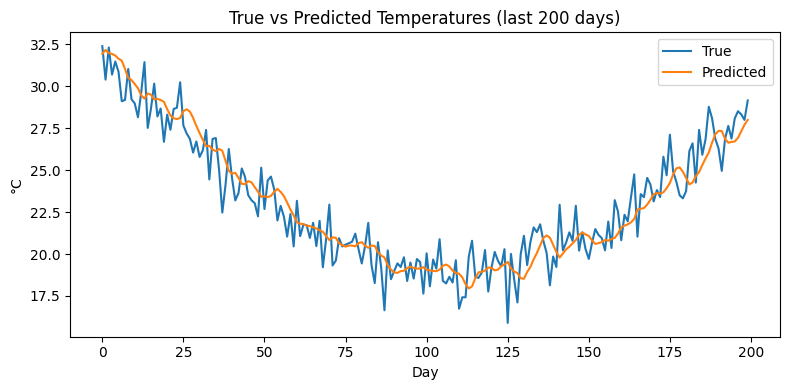

In [ ]:
# --- Weather prediction with GRU on synthetic temperature data ---

# (Optional) If you hit a NumPy 2.0 / np.complex error in Colab, uncomment:
# !pip install -q "numpy<2"

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)

# 1) Create synthetic daily temperature series (e.g., 5 years)
days = 5 * 365
t = np.arange(days)
baseline = 20.0
seasonal = 10 * np.sin(2 * np.pi * t / 365)      # yearly seasonality
trend = 0.005 * t                                 # slight warming trend
noise = np.random.normal(0, 1.2, size=days)       # daily noise
temps = baseline + seasonal + trend + noise
temps = temps.reshape(-1, 1)

# 2) Scale to [0,1] for stable training
scaler = MinMaxScaler()
temps_scaled = scaler.fit_transform(temps)

# 3) Build (X,y) with sliding window of 7 days -> predict day 8
def make_xy(series, window=7):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

WINDOW = 7
X, y = make_xy(temps_scaled, WINDOW)

# 4) Train/test split (80/20)
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

# 5) GRU model
model = Sequential([
    GRU(32, input_shape=(WINDOW, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 6) Train
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 7) Evaluate and predict
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE (scaled): {test_mae:.4f}")

# Convert MAE back to temperature units for intuition
# (Predict on test to compute MAE in original scale)
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

mae_celsius = np.mean(np.abs(y_true - y_pred))
print(f"Test MAE (°C): {mae_celsius:.2f}")

# 8) Predict the next day after the last available 7 days
last_window = temps_scaled[-WINDOW:].reshape(1, WINDOW, 1)
next_day_scaled = model.predict(last_window)
next_day_temp = scaler.inverse_transform(next_day_scaled)[0,0]
print(f"Predicted next-day temperature: {next_day_temp:.2f} °C")

# 9) Quick plot (last 200 days: true vs predicted)
plt.figure(figsize=(8,4))
plt.title("True vs Predicted Temperatures (last 200 days)")
plt.plot(y_true[-200:], label="True")
plt.plot(y_pred[-200:], label="Predicted")
plt.xlabel("Day")
plt.ylabel("°C")
plt.legend()
plt.tight_layout()
plt.show()


## Q4.You are a data engineer working for a telecom company that wants to build a machine learning model to detect spam messages. The data science team hasprovided you with a small sample of labeled SMS messages. Your task is toprepare this data in a format suitable for training a BERT-based text classification model using the SimpleTransformers library.Write a Python program that:
- Stores the below messages and labels in a structured format.
- Saves the data to a CSV file named sms_data.csv with two columns: text and
labels.
- Ensures the file is ready for use with SimpleTransformers for binary
classification

In [ ]:
# --- SMS Spam Data Preparation for SimpleTransformers ---

import pandas as pd

# 1️ Sample labeled SMS messages
data = {
    "text": [
        "Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
        "Hey, are we still meeting for lunch today?",
        "URGENT! Your mobile number has won 2 free tickets to the Bahamas. Call 09012345678 now!",
        "Can you please send me the report by evening?",
        "You’ve been selected for a free cruise trip! Reply YES to claim.",
        "Let’s catch up at the café tomorrow.",
        "Win cash prizes now!!! Visit our website for details.",
        "Are you available for the project meeting at 10 AM?",
        "Get a free entry to the concert. Text WIN to 90090 now!",
        "Good morning! How was your weekend?"
    ],
    "labels": [
        1,  # spam
        0,  # ham
        1,
        0,
        1,
        0,
        1,
        0,
        1,
        0
    ]
}

# 2️ Create a DataFrame
df = pd.DataFrame(data)

# 3️ Save to CSV file
df.to_csv("sms_data.csv", index=False)

# 4️ Display confirmation
print("✅ sms_data.csv created successfully!")
print("\nSample Data:\n")
print(df.head())

# 5️  Check if CSV looks ready for SimpleTransformers
print("\nColumns in CSV:", list(df.columns))


✅ sms_data.csv created successfully!

Sample Data:

                                                text  labels
0  Congratulations! You have won a $1000 Walmart ...       1
1         Hey, are we still meeting for lunch today?       0
2  URGENT! Your mobile number has won 2 free tick...       1
3      Can you please send me the report by evening?       0
4  You’ve been selected for a free cruise trip! R...       1

Columns in CSV: ['text', 'labels']


## Q5. You are mentoring a student team working on an AI-powered wildlife monitoring system. The system uses a Vision Transformer (ViT) model to classify animal species from camera trap images. Develop Python code using Hugging Face's library and a pretrained ViT model:


In [ ]:
# --- AI-Powered Wildlife Monitoring System using ViT ---

# 1️ Install Hugging Face Transformers (if not already installed)
!pip install -q transformers torch torchvision pillow

# 2️ Import libraries
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import requests
import torch

# 3️ Load a pretrained ViT model and processor
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# 4️ Load a sample image (replace with your camera trap image path or URL)
# Example wildlife image
image_url = "https://huggingface.co/datasets/mishig/sample_images/resolve/main/zebra.jpg"
image = Image.open("/content/zebra.jpg")

# 5️ Preprocess image for model input
inputs = processor(images=image, return_tensors="pt")

# 6️ Perform prediction
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

# 7️ Display result
predicted_label = model.config.id2label[predicted_class_idx]
print(f"Predicted Animal Species: {predicted_label}")

# 8️ Show the image
image.show()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Predicted Animal Species: zebra


## Q6.You are guiding a student team developing a lightweight image classification tool for a mobile wildlife conservation app. The app uses a pretrained MobileNetV2 model to identify animals from camera trap images

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.8.0 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.3.2 which is incompatible.
jaxlib 0.8.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.8.0 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.3.2 which is incompatible.
jax 0.8.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.16.1 which is incompatible.
tensorstore 0.1.78 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.3.2 which is incompatible.
/content/elephant.jpeg


Saving elephant.jpeg to elephant (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🔍 Top Predictions:
1. tusker (57.60%)
2. African_elephant (15.63%)
3. Indian_elephant (8.27%)


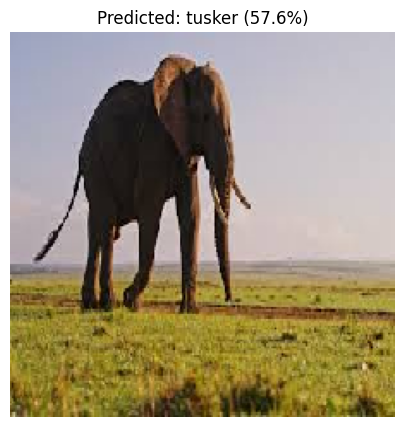

In [ ]:
# --- Wildlife Classification using MobileNetV2 (for local image) ---

# 1️ Install dependencies (if not already installed)
!pip install -q tensorflow pillow

# 2️ Import required libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 3️ Upload your local wildlife image (e.g., elephant.jpg)
print("/content/elephant.jpeg")
uploaded = files.upload()  # choose your image file

# Get uploaded image filename
img_path = list(uploaded.keys())[0]

# 4️ Load pretrained MobileNetV2 (lightweight and mobile-friendly)
model = MobileNetV2(weights='imagenet')

# 5️ Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 6️ Predict the animal species
preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=3)[0]

# 7️ Show top predictions
print("\n🔍 Top Predictions:")
for rank, (imagenet_id, label, score) in enumerate(decoded_preds):
    print(f"{rank+1}. {label} ({score*100:.2f}%)")

# 8️ Display image with top prediction as title
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.1f}%)", fontsize=12)
plt.show()


## Q7.7. You are mentoring a student team building a lightweight pet monitoring system for animal shelters. The system should uses a pretrained YOLOv8 model to detect cats and dogs from webcam snapshots.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 35.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.8.0 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.
jax 0.8.0 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.3.2 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but yo

Saving dog cat.png to dog cat (1).png

✅ Image 'dog cat (1).png' uploaded successfully!

image 1/1 /content/dog cat (1).png: 640x640 2 cats, 1 dog, 289.0ms
Speed: 18.6ms preprocess, 289.0ms inference, 31.9ms postprocess per image at shape (1, 3, 640, 640)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


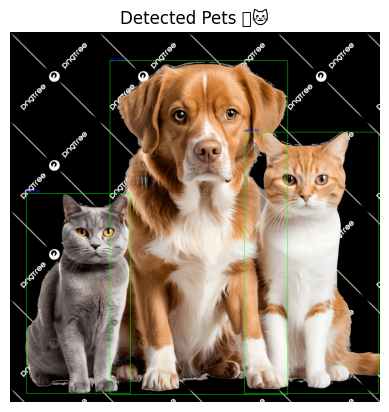

In [ ]:
# --- Lightweight Pet Monitoring System using YOLOv8 ---
# Detects cats and dogs from webcam snapshots or uploaded photos

# 1️⃣ Install and import dependencies
!pip install -q ultralytics opencv-python pillow

from ultralytics import YOLO
import cv2
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# 2️⃣ Load a pretrained YOLOv8 model (trained on COCO dataset)
# YOLOv8n = nano version (fast and lightweight, ideal for mobile/edge use)
model = YOLO("yolov8n.pt")

# 3️⃣ Option A: Upload a photo (snapshot from webcam or image)
print("/content/dog cat.png")
uploaded = files.upload()

# Get uploaded file path
img_path = list(uploaded.keys())[0]
print(f"\n✅ Image '{img_path}' uploaded successfully!")

# 4️⃣ Run YOLOv8 detection
results = model(img_path)

# 5️⃣ Filter only cats and dogs (class IDs: 15=cat, 16=dog in COCO)
for r in results:
    boxes = r.boxes
    filtered_boxes = []
    for box in boxes:
        cls_id = int(box.cls[0])
        if cls_id in [15, 16]:  # cat or dog
            filtered_boxes.append(box)

    # Draw filtered boxes on the image
    im_array = r.orig_img.copy()
    for box in filtered_boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = r.names[int(box.cls[0])]
        conf = box.conf[0]
        cv2.rectangle(im_array, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(im_array, f"{label} {conf:.2f}", (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Convert BGR to RGB and display
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.title("Detected Pets 🐶🐱")
    plt.show()


## Q8.8. You are mentoring a student team working on a project to generate synthetic handwritten digits for data augmentation in a digit recognition system.Implement a basic Generative Adversarial Network (GAN) using PyTorch. Thearchitecture includes:• Generator that maps a 100-dimensional noise vector to a 28×28 grayscale image. • A Discriminator that classifies input images as real or fake.

Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 506kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.82MB/s]


Epoch [1/20]  D_loss: 0.0001  G_loss: 8.7176
Epoch [2/20]  D_loss: 0.0001  G_loss: 9.0456
Epoch [3/20]  D_loss: 0.0000  G_loss: 10.2978
Epoch [4/20]  D_loss: 0.0000  G_loss: 11.1716
Epoch [5/20]  D_loss: 0.0000  G_loss: 11.7197
Epoch [6/20]  D_loss: 0.0000  G_loss: 12.2154
Epoch [7/20]  D_loss: 0.0000  G_loss: 12.5994
Epoch [8/20]  D_loss: 0.0000  G_loss: 12.9026
Epoch [9/20]  D_loss: 0.0000  G_loss: 13.0554
Epoch [10/20]  D_loss: 0.0000  G_loss: 10.3631
Epoch [11/20]  D_loss: 0.0000  G_loss: 11.4427
Epoch [12/20]  D_loss: 0.0000  G_loss: 11.9988
Epoch [13/20]  D_loss: 0.0000  G_loss: 12.5204
Epoch [14/20]  D_loss: 0.0000  G_loss: 12.7859
Epoch [15/20]  D_loss: 0.0000  G_loss: 13.1430
Epoch [16/20]  D_loss: 0.0000  G_loss: 13.6427
Epoch [17/20]  D_loss: 0.0000  G_loss: 14.0601
Epoch [18/20]  D_loss: 0.0000  G_loss: 14.3389
Epoch [19/20]  D_loss: 0.0000  G_loss: 14.5283
Epoch [20/20]  D_loss: 0.0000  G_loss: 14.9377


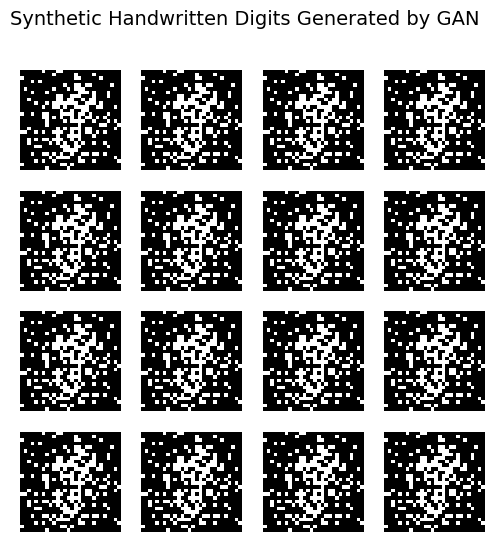

In [ ]:
# --- Basic GAN for Synthetic Handwritten Digit Generation (PyTorch) ---

# 1️⃣ Install and import dependencies
!pip install -q torch torchvision matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 2️⃣ Device setup (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 3️⃣ Hyperparameters
latent_dim = 100
batch_size = 128
epochs = 20
lr = 0.0002

# 4️⃣ MNIST dataset (for real images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # scale to [-1, 1]
])
dataloader = DataLoader(
    datasets.MNIST(root="./data", train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

# 5️⃣ Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28*28),
            nn.Tanh()  # outputs between [-1, 1]
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), 1, 28, 28)

# 6️⃣ Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        flat = img.view(img.size(0), -1)
        return self.model(flat)

# 7️⃣ Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# 8️⃣ Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# 9️⃣ Training loop
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        real_imgs = imgs.to(device)
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), real_labels)
        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")

# 🔟 Generate new synthetic handwritten digits
generator.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    gen_imgs = generator(z).cpu()

# Convert to [0,1] range for display
gen_imgs = (gen_imgs + 1) / 2.0

# Show generated digits
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(gen_imgs[i][0], cmap="gray")
    plt.axis("off")
plt.suptitle("Synthetic Handwritten Digits Generated by GAN", fontsize=14)
plt.show()
